### Code to find goalposts and ball

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Reshape, Flatten, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.merge import concatenate
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import SGD, Adam, RMSprop
#from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')

Using TensorFlow backend.


In [3]:
import glob
import bisect
from os.path import basename
import xml.etree.ElementTree
import numpy as np
import cv2

In [4]:
def Reduzida25_skip(input_size, cosize):

    input_image = Input(shape=(input_size, cosize, 3))

    # Layer 1
    x = Conv2D(4, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input_image)
    x = BatchNormalization(name='norm_1')(x)
    x = LeakyReLU(alpha=0.1)(x)

    x = Conv2D(8, (3,3), strides=(1,1), padding='same', name='conv_' + str(0+2), use_bias=False)(x)
    x = BatchNormalization(name='norm_' + str(0+2))(x)
    x = LeakyReLU(alpha=0.1)(x)
    
    
        # Layer 2 - 5
    for i in range(1,4):
        x = Conv2D(4*(2**i), (3,3), strides=(1,1), padding='same', name='conv_' + str(i+2), use_bias=False)(x)
        x = BatchNormalization(name='norm_' + str(i+2))(x)
        x = LeakyReLU(alpha=0.1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)

        # Layer 6
    x = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_6', use_bias=False)(x)
    x = BatchNormalization(name='norm_6')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same')(x)
    
    skip_connection = x

        # Layer 7 - 8
    for i in range(0,2):
        x = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_' + str(i+7), use_bias=False)(x)
        x = BatchNormalization(name='norm_' + str(i+7))(x)
        x = LeakyReLU(alpha=0.1)(x)
        
    skip_connection = Conv2D(64, (1,1), strides=(1,1), padding='same', name='conv_skip', use_bias=False)(skip_connection)
    skip_connection = BatchNormalization(name='norm_21')(skip_connection)
    skip_connection = LeakyReLU(alpha=0.1)(skip_connection)
    #skip_connection = Lambda(space_to_depth_x2)(skip_connection)

    x = concatenate([skip_connection, x])
        
        
    x = Conv2D(10, (1,1), strides = (1,1), padding = 'same', name = 'conv_9', use_bias = True)(x)
        
    model = Model(inputs = input_image, outputs=x, name='Fast')
        
    
    return model

In [5]:
def minha2_skip_pequena(input_size, cosize):

    input_image = Input(shape=(input_size, cosize, 3))

    # Layer 1
    #Originalmente era quatro, mas coloquei oito
    x = Conv2D(8, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input_image)
    x = BatchNormalization(name='norm_1')(x)
    x = LeakyReLU(alpha=0.1)(x)
    
    x = Conv2D(8*(2**0), (3,3), strides=(1,1), padding='same', name='conv_' + str(2), use_bias=False)(x)
    x = BatchNormalization(name='norm_' + str(2))(x)
    x = LeakyReLU(alpha=0.1)(x)
    
        # Layer 2 - 5
    for i in range(1,4):
        x = Conv2D(8*(2**i), (3,3), strides=(1,1), padding='same', name='conv_' + str(i+2), use_bias=False)(x)
        x = BatchNormalization(name='norm_' + str(i+2))(x)
        x = LeakyReLU(alpha=0.1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)

        # Layer 6
    x = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_6', use_bias=False)(x)
    x = BatchNormalization(name='norm_6')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same')(x)
    
    skip_connection = x

        # Layer 7 - 8
    for i in range(0,2):
        x = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_' + str(i+7), use_bias=False)(x)
        x = BatchNormalization(name='norm_' + str(i+7))(x)
        x = LeakyReLU(alpha=0.1)(x)
        
    skip_connection = Conv2D(128, (1,1), strides=(1,1), padding='same', name='conv_skip', use_bias=False)(skip_connection)
    skip_connection = BatchNormalization(name='norm_21')(skip_connection)
    skip_connection = LeakyReLU(alpha=0.1)(skip_connection)
    #skip_connection = Lambda(space_to_depth_x2)(skip_connection)

    x = concatenate([skip_connection, x])
        
        
    x = Conv2D(10, (1,1), strides = (1,1), padding = 'same', name = 'conv_9', use_bias = True)(x)
        
    model = Model(inputs = input_image, outputs=x, name='Fast')
        
    
    return model

In [6]:
def minha2_skip_pequena2(input_size, cosize):

    input_image = Input(shape=(input_size, cosize, 3))

    # Layer 1
    #Originalmente era quatro, mas coloquei oito
    x = Conv2D(8, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input_image)
    x = BatchNormalization(name='norm_1')(x)
    x = LeakyReLU(alpha=0.1)(x)
    
    x = Conv2D(8*(2**0), (3,3), strides=(1,1), padding='same', name='conv_' + str(2), use_bias=False)(x)
    x = BatchNormalization(name='norm_' + str(2))(x)
    x = LeakyReLU(alpha=0.1)(x)
    
        # Layer 2 - 5
    for i in range(1,4):
        x = Conv2D(8*(2**i), (3,3), strides=(1,1), padding='same', name='conv_' + str(i+2), use_bias=False)(x)
        x = BatchNormalization(name='norm_' + str(i+2))(x)
        x = LeakyReLU(alpha=0.1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)

        # Layer 6
    x = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_6', use_bias=False)(x)
    x = BatchNormalization(name='norm_6')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same')(x)
    
    skip_connection = x

        # Layer 7 - 8
    for i in range(0,2):
        x = Conv2D(128*2**(i), (3,3), strides=(1,1), padding='same', name='conv_' + str(i+7), use_bias=False)(x)
        x = BatchNormalization(name='norm_' + str(i+7))(x)
        x = LeakyReLU(alpha=0.1)(x)
        
    skip_connection = Conv2D(128, (1,1), strides=(1,1), padding='same', name='conv_skip', use_bias=False)(skip_connection)
    skip_connection = BatchNormalization(name='norm_21')(skip_connection)
    skip_connection = LeakyReLU(alpha=0.1)(skip_connection)
    #skip_connection = Lambda(space_to_depth_x2)(skip_connection)

    x = concatenate([skip_connection, x])
        
        
    x = Conv2D(10, (1,1), strides = (1,1), padding = 'same', name = 'conv_9', use_bias = True)(x)
        
    model = Model(inputs = input_image, outputs=x, name='Fast')
        
    
    return model

In [7]:
rede = minha2_skip_pequena(120,160)
rede.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 120, 160, 3)  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 120, 160, 8)  216         input_1[0][0]                    
__________________________________________________________________________________________________
norm_1 (BatchNormalization)     (None, 120, 160, 8)  32          conv_1[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 120, 160, 8)  0           norm_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Co

In [8]:
pasta_atual = os.getcwd()

In [9]:
def Metodo3(pasta):  #trave com dimensoes
    
    nomesdearquivos = glob.glob(pasta + '/*.xml')
    fotos = glob.glob(pasta + '/*.png')
    maisfotos = glob.glob(pasta+ '/*.jpg')
    for nome in maisfotos:
        fotos.append(nome)
    fotosjpeg = glob.glob(pasta + '/*.jpeg')
    for nome in fotosjpeg:
        fotos.append(nome)
    fotosJPG = glob.glob(pasta + '/*.JPG')
    for nome in fotosJPG:
        fotos.append(nome)
    nomesdearquivos.sort()
    fotos.sort()
    nomesdasanotacoes = list()
    for nomeindo in nomesdearquivos:
        bisect.insort(nomesdasanotacoes, basename(nomeindo).split('.')[0])
        
    
    para_imprimir = list()
    entrada = list()
    for nome in nomesdasanotacoes:
        e = xml.etree.ElementTree.parse(pasta+'/'+nome+'.xml').getroot()
        objects = e.findall('object')           
        
        resposta = np.zeros((15,20,10), dtype=float)
        
        ball = None
        goalpost = None
        goalpost_2 = None
        
        if objects is None:
            para_imprimir.append(resposta)
        else:
            tam = len(objects)
            for i in range(0, tam):
                if objects[i][0].text == 'ball':
                    ball = objects[i]
                elif objects[i][0].text == 'goalpost':
                    goalpost = objects[i]
                elif objects[i][0].text == 'goalpost_2':
                    goalpost_2 = objects[i]
            
            
        if ball is not None:
                
            ball_xmin = float(ball[4][0].text)/4
            ball_ymin = float(ball[4][1].text)/4
            ball_xmax = float(ball[4][2].text)/4
            ball_ymax = float(ball[4][3].text)/4
                
            ball_Xc = (ball_xmin + ball_xmax)/2
            ball_posicx = int((ball_Xc)/8)
            ball_Xc = ball_Xc - ball_posicx*8
            ball_Xc = ball_Xc/8
            ball_Yc = (ball_ymin + ball_ymax)/2
            ball_posicy = int((ball_Yc)/8)
            ball_Yc = ball_Yc - ball_posicy*8
            ball_Yc = ball_Yc/8
            ball_largura = (ball_xmax - ball_xmin)/160
            ball_altura = (ball_ymax - ball_ymin)/160
                
            resposta[ball_posicy][ball_posicx][0:5] = (1, ball_Xc, ball_Yc, ball_largura, ball_altura)
            
                      
        if goalpost is not None:
            
            goalpost_xmin = float(goalpost[4][0].text)/4
            goalpost_ymin = float(goalpost[4][1].text)/4
            goalpost_xmax = float(goalpost[4][2].text)/4
            goalpost_ymax = float(goalpost[4][3].text)/4
            
            goalpost_Xc = (goalpost_xmin + goalpost_xmax)/2
            goalpost_posicx = int((goalpost_Xc)/8)
            goalpost_Xc = goalpost_Xc - goalpost_posicx*8
            goalpost_Xc = goalpost_Xc/8
            goalpost_Yc = (goalpost_ymin + goalpost_ymax)/2
            goalpost_posicy = int((goalpost_Yc)/8)
            goalpost_Yc = goalpost_Yc - goalpost_posicy*8
            goalpost_Yc = goalpost_Yc/8
            goalpost_largura = (goalpost_xmax - goalpost_xmin)/160
            goalpost_altura = (goalpost_ymax - goalpost_ymin)/160
            
            resposta[goalpost_posicy][goalpost_posicx][5:10] = (1,goalpost_Xc, goalpost_Yc, goalpost_largura, goalpost_altura)
            #Funcao de custo esta errada, pois assim deu certo. Alem disso, escolher outra forma de 
            #marcar a trave
        
        if goalpost_2 is not None:
            
            goalpost2_xmin = float(goalpost_2[4][0].text)/4
            goalpost2_ymin = float(goalpost_2[4][1].text)/4
            goalpost2_xmax = float(goalpost_2[4][2].text)/4
            goalpost2_ymax = float(goalpost_2[4][3].text)/4
            
            goalpost2_Xc = (goalpost2_xmin + goalpost2_xmax)/2
            goalpost2_posicx = int((goalpost2_Xc)/8)
            goalpost2_Xc = goalpost2_Xc - goalpost2_posicx*8
            goalpost2_Xc = goalpost2_Xc/8
            goalpost2_Yc = (goalpost2_ymin + goalpost2_ymax)/2
            goalpost2_posicy = int((goalpost2_Yc)/8)
            goalpost2_Yc = goalpost2_Yc - goalpost2_posicy*8
            goalpost2_Yc = goalpost2_Yc/8
            goalpost2_largura = (goalpost2_xmax - goalpost2_xmin)/160
            goalpost2_altura = (goalpost2_ymax - goalpost2_ymin)/160
        
            resposta[goalpost2_posicy][goalpost2_posicx][5:10] = (1, goalpost2_Xc, goalpost2_Yc, goalpost2_largura, goalpost2_altura)
            #Funcao de custo esta errada, pois assim deu certo. Alem disso, escolher outra forma de 
            #marcar a trave
        
        para_imprimir.append(resposta)
        
    Y = np.array(para_imprimir)

    for arquivo in fotos:
        img = cv2.imread(arquivo)
        img = cv2.resize(img, (160,120), interpolation = cv2.INTER_AREA)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        entrada.append(img)
        
    
    X = np.array(entrada)
    X = X.astype(float)
    X = X/255
    
    return X, Y


In [10]:
carregar = list()
carregar = os.listdir(pasta_atual + '/Conjunto de Treino 2019')
#Essa aí é a pasta que contém as imagens de treino

In [11]:
x, y = Metodo3(pasta_atual +'/Conjunto de Treino 2019/' + carregar[len(carregar)-1])
carregar.pop();

In [ ]:
for pasta in carregar:
    x1, y1 = Metodo3(pasta_atual +'/Conjunto de Treino 2019/' + pasta)
    x = np.concatenate((x,x1), axis=0)
    y = np.concatenate((y,y1), axis=0)
    x1 = None
    y1 = None

In [ ]:
x_val, y_val = Metodo3(pasta_atual +'/Validation set')

In [ ]:
print("Formato do X", x.shape)
print("Foramto do Y", y.shape)

In [ ]:
print("Formato do X_val", x_val.shape)
print("Foramto do Y_val", y_val.shape)

In [ ]:
def ball_goalpost_loss3(y_true, y_pred): #Trave com dimensoes
    
    #BALL
    Xc_true = y_true[...,1]
    Xc_pred = tf.sigmoid(y_pred[..., 1])        ##mudei aqui
    Yc_true = y_true[..., 2]
    Yc_pred = tf.sigmoid(y_pred[..., 2])        ##mudei aqui
    W_true = tf.sqrt(tf.abs(y_true[...,3]))
    H_true = tf.sqrt(tf.abs(y_true[...,4]))
    WH_pred = tf.sqrt(tf.abs(tf.exp(y_pred[..., 3:5])*np.reshape(ANCHORS, [1,1,BOX,2])))
    W_pred = WH_pred[...,0]
    H_pred = WH_pred[...,1]
    confidence_true = y_true[...,0]
    confidence_pred = tf.sigmoid(y_pred[...,0])
    class_true = y_true[...,0]
    
    #GOALPOST
    Xc_true_post = y_true[...,6]
    Xc_pred_post = tf.sigmoid(y_pred[..., 6])        ##mudei aqui
    Yc_true_post = y_true[..., 7]
    Yc_pred_post = tf.sigmoid(y_pred[..., 7])        ##mudei aqui
    W_true_post = tf.sqrt(tf.abs(y_true[...,8]))
    H_true_post = tf.sqrt(tf.abs(y_true[...,9]))
    WH_pred_post = tf.sqrt(tf.abs(tf.exp(y_pred[..., 8:10])*np.reshape(ANCHORS_post, [1,1,BOX,2])))
    W_pred_post = WH_pred_post[...,0]
    H_pred_post = WH_pred_post[...,1]
    confidence_true_post = y_true[...,5]
    confidence_pred_post = tf.sigmoid(y_pred[...,5])
    class_true_post = y_true[...,5]
    
    
    #BALL
    Xc_pred = tf.multiply(class_true,Xc_pred)
    Yc_pred = tf.multiply(class_true, Yc_pred)
    H_pred = tf.multiply(class_true, H_pred)
    W_pred = tf.multiply(class_true, W_pred)
    
    
    #GOALPOST
    Xc_pred_post = tf.multiply(class_true_post, Xc_pred_post)
    Yc_pred_post = tf.multiply(class_true_post, Yc_pred_post)
    H_pred_post = tf.multiply(class_true_post, H_pred_post)
    W_pred_post = tf.multiply(class_true_post, W_pred_post)
    
    #BALL
    loss_xy = (tf.square(Xc_pred - Xc_true) + tf.square(Yc_pred - Yc_true))
    loss_xy = 5*tf.reduce_sum(loss_xy)
    
    #GOALPOST    
    loss_xy_post = (tf.square(Xc_pred_post - Xc_true_post) + tf.square(Yc_pred_post - Yc_true_post))
    loss_xy_post = 5*tf.reduce_sum(loss_xy_post)
    
    #BALL
    loss_wh = (tf.square(W_true - W_pred) + tf.square(H_pred - H_true))
    loss_wh = 20*tf.reduce_sum(loss_wh)  #era 10
    
    #GOALPOST
    loss_wh_post = (tf.square(W_true_post - W_pred_post) + tf.square(H_pred_post - H_true_post))
    loss_wh_post = 20*tf.reduce_sum(loss_wh_post)  #era 10
    
    #BALL
    no_object = 1 - class_true
    diff_conf = tf.square(confidence_true - confidence_pred)
    loss_no_object = (tf.multiply(diff_conf, no_object))
    loss_no_object = 10*tf.reduce_sum(loss_no_object)  #era 0.5
    
    loss_object = 50*tf.reduce_sum(tf.multiply(class_true, diff_conf)) #era 5
    
    #GOALPOST
    no_object_post = 1 - class_true_post
    diff_conf_post = tf.square(confidence_true_post - confidence_pred_post)
    loss_no_object_post = (tf.multiply(diff_conf_post, no_object_post))
    loss_no_object_post = 10*tf.reduce_sum(loss_no_object_post)  #era 0.5
    
    loss_object_post = 50*tf.reduce_sum(tf.multiply(class_true_post, diff_conf_post)) #era 5
    
    
    
    #loss_class = tf.nn.sigmoid_cross_entropy_with_logits(labels = class_true, logits = class_pred)
    #loss_class = tf.reduce_sum(loss_class)
    
    loss = loss_xy + loss_wh + loss_no_object + loss_object + loss_xy_post + loss_wh_post + loss_no_object_post + loss_object_post #loss_class
    
    
    return loss

In [ ]:
import keras
callbacks = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.01,patience=1, verbose=0, mode='auto')

In [ ]:
optimizer = Adam (lr=0.5e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#optimizer = SGD(lr=1e-4, decay=0.0005, momentum=0.9)
#optimizer = RMSprop(lr=1e-4, rho=0.9, epsilon=1e-08, decay=0.0)
from keras.losses import mean_squared_error

ANCHORS = [5,5]
BOX = 1
ANCHORS_post = [2,5] ##MUDAR AQUI PARA [2,5]


rede.compile(loss=ball_goalpost_loss3, optimizer=optimizer)


rede.fit(x, y, validation_data = (x_val, y_val), epochs=100, batch_size=5)
#existe tambem o validation split
#validantion_data = (x_val,y_val)
rede.compile(loss=mean_squared_error, optimizer='sgd', metrics = ['accuracy'])
rede.save(pasta_atual+ '/Enxergar a trave/Retangulo_pequeno.hdf5')

## To run the neural network, start here

In [1]:
from keras.models import load_model
from keras import layers
import os
import cv2
from matplotlib.pyplot import imshow
import numpy as np
import time

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
ANCHORS = [5,5]
ANCHORS_post = [2,5]
BOX = 1

Using TensorFlow backend.


In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(np.negative(x)))

In [3]:
def respostafinal(Y):
    Y = np.reshape(Y, (15,20,10))
    classe_ball = sigmoid(Y[...,0])
    classe_post = sigmoid(Y[...,5])
    ball_i, ball_j = np.unravel_index(np.argmax(classe_ball), np.shape(classe_ball))
    post_i, post_j = np.unravel_index(np.argmax(classe_post), np.shape(classe_post))
    classe_post[post_i, post_j] = -100
    post2_i, post2_j = np.unravel_index(np.argmax(classe_post), np.shape(classe_post))
    resposta_ball = Y[ball_i, ball_j, 0:5]
    resposta_ball[0] = sigmoid(resposta_ball[0])
    resposta_ball[1:3] = sigmoid(resposta_ball[1:3])
    resposta_ball[3:5] = (np.exp(resposta_ball[3:5]))*np.reshape(ANCHORS, [1,1,BOX,2])
    resposta_post1 = Y[post_i,post_j,5:10]
    resposta_post1[0] = sigmoid(resposta_post1[0])
    resposta_post1[1:3] = sigmoid(resposta_post1[1:3])
    resposta_post1[3:5] = (np.exp(resposta_post1[3:5]))*np.reshape(ANCHORS_post, [1,1,BOX,2])
    resposta_post2 = Y[post2_i, post2_j, 5:10]
    resposta_post2[0] = sigmoid(resposta_post2[0])
    resposta_post2[1:3] = sigmoid(resposta_post2[1:3])
    resposta_post2[3:5] = (np.exp(resposta_post2[3:5]))*np.reshape(ANCHORS_post, [1,1,BOX,2])
    return resposta_ball, ball_j, ball_i,resposta_post1, post_j, post_i, resposta_post2, post2_j, post2_i

In [4]:
def arrumando25_2(res, i ,j ,res1, i1, j1, res2, i2, j2):
    probabilidade = res[0]
    Xc = (res[1] + i*4)*8
    Yc = (res[2] + j*4)*8
    H = res[4]*640
    W = res[3]*640
    probabilidade1 = res1[0]
    Xc_post1 = (res1[1] + i1*4)*8
    Yc_post1 = (res1[2] + j1*4)*8
    H_post1 = res1[4]*640
    W_post1 = res1[3]*640
    probabilidade2 = res2[0]
    Xc_post2 = (res2[1] + i2*4)*8
    Yc_post2 = (res2[2] + j2*4)*8
    H_post2 = res2[4]*640
    W_post2 = res2[3]*640
    vetor = [probabilidade, Xc, Yc, W, H, probabilidade1, Xc_post1, Yc_post1, W_post1, H_post1, probabilidade2, Xc_post2, Yc_post2, W_post2, H_post2]
    return vetor

In [5]:
def plotarimagem_2(resposta, image):
    Xc = int(resposta[1])
    Yc = int(resposta[2])
    largura = resposta[3]
    altura = resposta[4]
    
    Xc1 = int(resposta[6])
    Yc1 = int(resposta[7])
    largura1 = resposta[8]
    altura1 = resposta[9]
    
    Xc2 = int(resposta[11])
    Yc2 = int(resposta[12])
    largura2 = resposta[13]
    altura2 = resposta[14]
    
    XMAX_post1 = int(2*Xc1 + largura1)/2
    XMIN_post1 = int(2*Xc1 - largura1)/2
    YMAX_post1 = int(2*Yc1 + altura1)/2
    YMIN_post1 = int(2*Yc1 - altura1)/2
    
    XMAX_post2 = int(2*Xc2 + largura2)/2
    XMIN_post2 = int(2*Xc2 - largura2)/2
    YMAX_post2 = int(2*Yc2 + altura2)/2
    YMIN_post2 = int(2*Yc2 - altura2)/2
    
    cv2.rectangle(image, (XMIN_post1, YMIN_post1), (XMAX_post1, YMAX_post1), [255, 0, 0], 5)
    cv2.rectangle(image, (XMIN_post2, YMIN_post2), (XMAX_post2, YMAX_post2), [0, 255, 0], 5)
    
    XMAX = int(2*Xc + largura)/2
    XMIN = int(2*Xc - largura)/2
    YMAX = int(2*Yc + altura)/2
    YMIN = int(2*Yc - altura)/2
    
    cv2.rectangle(image, (XMIN,YMIN), (XMAX, YMAX), [0,0, 255], 5)
    cv2.rectangle(image, (Xc, Yc), (Xc+2, Yc+2), [123, 70, 0], 20)
    
    #cv2.imwrite(pasta_atual + '/apresentacao.jpg', img)
    image = image/255
    imshow(image)

## Import an image and estimate the result

Pay attention to the image's file

Pay attention to the neural network to be loaded

In [22]:
pasta_atual = os.getcwd()
yolo = load_model(pasta_atual+ '/Rededeteste_colfax.hdf5')

(0.9999707, 0.0018851445, 0.001775345)
0.025484085083


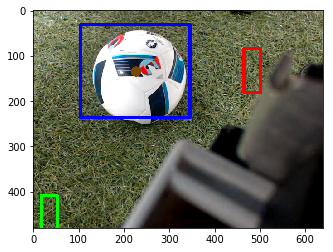

In [24]:
img = cv2.imread(pasta_atual + '/nova4.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.array(img);
ima = cv2.resize(img, (160,120), interpolation = cv2.INTER_AREA)
ima = ima.astype(float)
img = img.astype(float)
ima = ima/255
ima = np.reshape(ima, (1, 120, 160, 3))


start1 = time.time()
resposta = yolo.predict(ima)
#end1 = time.time()

#start2 = time.time()
a1, b1,c1, a2, b2, c2, a3, b3, c3 = respostafinal(resposta)
resposta = arrumando25_2(a1,b1,c1, a2, b2, c2, a3, b3, c3)
end2 = time.time()

print(resposta[0], resposta[5], resposta[10])
#resposta[4] = resposta[4]-1000
plotarimagem_2(resposta, img)
print(end2-start1)
#print(end2-start2)

#### Testando a eficácia da rede

### Importando bibliotecas importantes

In [1]:
from keras.models import load_model
from keras import layers
import os
import time
import glob
import bisect
from os.path import basename
import xml.etree.ElementTree
import cv2
import numpy as np
import operator
from matplotlib.pyplot import imshow

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
ANCHORS = [5,5]
ANCHORS_post = [2,5]
BOX = 1
pasta_atual = os.getcwd()

Using TensorFlow backend.


### Funções para carregar imagens e anotações

In [2]:
def Imagem25(pasta):  #trave com dimensoes
    
    nomesdearquivos = glob.glob(pasta + '/*.xml')
    fotos = glob.glob(pasta + '/*.png')
    maisfotos = glob.glob(pasta+ '/*.jpg')
    for nome in maisfotos:
        fotos.append(nome)
    fotosjpeg = glob.glob(pasta + '/*.jpeg')
    for nome in fotosjpeg:
        fotos.append(nome)
    fotosJPG = glob.glob(pasta + '/*.JPG')
    for nome in fotosJPG:
        fotos.append(nome)
    nomesdearquivos.sort()
    fotos.sort()
    nomesdasanotacoes = list()
    for nomeindo in nomesdearquivos:
        bisect.insort(nomesdasanotacoes, basename(nomeindo).split('.')[0])
        
    
    para_imprimir = list()
    entrada = list()
    for nome in nomesdasanotacoes:
        e = xml.etree.ElementTree.parse(pasta+'/'+nome+'.xml').getroot()
        objects = e.findall('object')           
        
        resposta = np.zeros((3,5), dtype=float)
        
        ball = None
        goalpost = None
        goalpost_2 = None
        
        if objects is None:
            para_imprimir.append(resposta)
        else:
            tam = len(objects)
            for i in range(0, tam):
                if objects[i][0].text == 'ball':
                    ball = objects[i]
                elif objects[i][0].text == 'goalpost':
                    goalpost = objects[i]
                elif objects[i][0].text == 'goalpost_2':
                    goalpost_2 = objects[i]
            
            
        if ball is not None:
                
            ball_xmin = float(ball[4][0].text)
            ball_ymin = float(ball[4][1].text)
            ball_xmax = float(ball[4][2].text)
            ball_ymax = float(ball[4][3].text)

            resposta[0] = (1, ball_xmin, ball_ymin, ball_xmax, ball_ymax)
            
                      
        if goalpost is not None:
            
            goalpost_xmin = float(goalpost[4][0].text)
            goalpost_ymin = float(goalpost[4][1].text)
            goalpost_xmax = float(goalpost[4][2].text)
            goalpost_ymax = float(goalpost[4][3].text)
            
            resposta[1] = (1,goalpost_xmin, goalpost_ymin, goalpost_xmax, goalpost_ymax)

        if goalpost_2 is not None:
            
            goalpost2_xmin = float(goalpost_2[4][0].text)
            goalpost2_ymin = float(goalpost_2[4][1].text)
            goalpost2_xmax = float(goalpost_2[4][2].text)
            goalpost2_ymax = float(goalpost_2[4][3].text)
        
            resposta[2] = (1, goalpost2_xmin, goalpost2_ymin, goalpost2_xmax, goalpost2_ymax)
        
        para_imprimir.append(resposta)
        
    Y = np.array(para_imprimir)

    for arquivo in fotos:
        img = cv2.imread(arquivo)
        img = cv2.resize(img, (160,120), interpolation = cv2.INTER_AREA)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        entrada.append(img)
        
    
    X = np.array(entrada)
    X = X.astype(float)
    X = X/255
    
    return X, Y


### Função IOU
Função divide a intersecção das áreas prevista e real pela sua união.

In [3]:
def iou(boxA,boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
 
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
 
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
 
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
 
    # return the intersection over union value
    return iou

#### Outras funções importantes

In [4]:
def sigmoid(x):
    return 1/(1 + np.exp(np.negative(x)))

In [5]:
def respostafinal(Y):
    Y = np.reshape(Y, (15,20,10))
    classe_ball = sigmoid(Y[...,0])
    classe_post = sigmoid(Y[...,5])
    ball_i, ball_j = np.unravel_index(np.argmax(classe_ball), np.shape(classe_ball))
    post_i, post_j = np.unravel_index(np.argmax(classe_post), np.shape(classe_post))
    classe_post[post_i, post_j] = -100
    post2_i, post2_j = np.unravel_index(np.argmax(classe_post), np.shape(classe_post))
    resposta_ball = Y[ball_i, ball_j, 0:5]
    resposta_ball[0] = sigmoid(resposta_ball[0])
    resposta_ball[1:3] = sigmoid(resposta_ball[1:3])
    resposta_ball[3:5] = (np.exp(resposta_ball[3:5]))*np.reshape(ANCHORS, [1,1,BOX,2])
    resposta_post1 = Y[post_i,post_j,5:10]
    resposta_post1[0] = sigmoid(resposta_post1[0])
    resposta_post1[1:3] = sigmoid(resposta_post1[1:3])
    resposta_post1[3:5] = (np.exp(resposta_post1[3:5]))*np.reshape(ANCHORS_post, [1,1,BOX,2])
    resposta_post2 = Y[post2_i, post2_j, 5:10]
    resposta_post2[0] = sigmoid(resposta_post2[0])
    resposta_post2[1:3] = sigmoid(resposta_post2[1:3])
    resposta_post2[3:5] = (np.exp(resposta_post2[3:5]))*np.reshape(ANCHORS_post, [1,1,BOX,2])
    return resposta_ball, ball_j, ball_i,resposta_post1, post_j, post_i, resposta_post2, post2_j, post2_i

In [6]:
def arrumando25_2(res, i ,j ,res1, i1, j1, res2, i2, j2):
    probabilidade = res[0]
    Xc = (res[1] + i*4)*8
    Yc = (res[2] + j*4)*8
    H = res[4]*640
    W = res[3]*640
    probabilidade1 = res1[0]
    Xc_post1 = (res1[1] + i1*4)*8
    Yc_post1 = (res1[2] + j1*4)*8
    H_post1 = res1[4]*640
    W_post1 = res1[3]*640
    probabilidade2 = res2[0]
    Xc_post2 = (res2[1] + i2*4)*8
    Yc_post2 = (res2[2] + j2*4)*8
    H_post2 = res2[4]*640
    W_post2 = res2[3]*640
    vetor = [probabilidade, Xc, Yc, W, H, probabilidade1, Xc_post1, Yc_post1, W_post1, H_post1, probabilidade2, Xc_post2, Yc_post2, W_post2, H_post2]
    return vetor

In [7]:
def coordenar(resposta):
    Xc = resposta[1]
    Yc = resposta[2]
    largura = resposta[3]
    altura = resposta[4]
    XMAX = min((2*Xc + largura)/2, 640)
    XMIN = max((2*Xc - largura)/2, 0)
    YMAX = min((2*Yc + altura)/2, 480)
    YMIN = max((2*Yc - altura)/2,0)
    FINAL = (XMIN, YMIN, XMAX, YMAX)
    return FINAL

### Carregando imagens e anotações

#### Atentar para ecolher o tamanho da imagem na funcao

In [22]:
x, y  = Imagem25(pasta_atual + '/Conjunto de teste')  ###colocar aqui alguma pasta
#z, w = Imagem25(pasta_atual + '/Testing_new2')
#x = np.concatenate((x, z), axis=0)
#y = np.concatenate((y, w), axis=0)
qtde = y.shape[0]
print(x.shape)
print(y.shape)
teste = load_model(pasta_atual+ '/Rededeteste_colfax.hdf5') ##atentar para o nome da rede.5

(1479, 120, 160, 3)
(1479, 3, 5)


In [23]:
tempo = 0
iou_ball = 0.0
iou_post_1 = 0.0
iou_post_2 = 0.0
TP_ball = 0
TN_ball = 0
FP_ball = 0
FN_ball = 0
TP_post_1 = 0
TN_post_1 = 0
FP_post_1 = 0
FN_post_1 = 0
TP_post_2 = 0
TN_post_2 = 0
FP_post_2 = 0
FN_post_2 = 0

In [24]:
for i in range(0, qtde):
    start = time.time()
    entra = np.reshape(x[i], (1, 120, 160, 3))
    entra = teste.predict(entra)
    a1, b1,c1, a2, b2, c2, a3, b3, c3 = respostafinal(entra)
    resposta = arrumando25_2(a1,b1,c1, a2, b2, c2, a3, b3, c3)
    probabilidade_bola = resposta[0]
    ball_box = coordenar(resposta[0:5])
    probabilidade_goalpost_1 = resposta[5]
    goalpost_1_box = coordenar(resposta[5:10])
    probabilidade_goalpost_2 = resposta[10]
    goalpost_2_box = coordenar(resposta[10:15])
    end = time.time()
    
    #ball verification
    
    if probabilidade_bola > 0.5:
        if y[i,0, 0] == 1:
            TP_ball = TP_ball + 1
            iou_ball = iou_ball + iou(ball_box, y[i, 0, 1:5])
        else:
            FP_ball = FP_ball + 1
    
    else:
        if y[i, 0, 0] == 1:
            FN_ball = FN_ball + 1
        else:
            TN_ball = TN_ball + 1
            
    #goalpost verifications
    
    if y[i, 1, 0] == 0 and y[i, 2, 0] == 0:
        if probabilidade_goalpost_1 > 0.5:
            FP_post_1 = FP_post_1 + 1
        else:
            TN_post_1 = TN_post_1 + 1
            
        if probabilidade_goalpost_2 > 0.5:
            FP_post_2 = FP_post_2 + 1
        else:
            TN_post_2 = TN_post_2 + 1
    
    elif y[i, 1, 0] == 1 and y[i, 2, 0] == 1:
        if probabilidade_goalpost_1 > 0.5:
            TP_post_1 = TP_post_1 + 1
            iou_post_1 = iou_post_1 + iou(y[i, 1, 1:5], goalpost_1_box)
        else:
            FN_post_1 = FN_post_1 + 1
            
        if probabilidade_goalpost_2 > 0.5:
            TP_post_2 = TP_post_2 + 1
            iou_post_2 = iou_post_2 + iou(y[i, 2, 1:5], goalpost_2_box)
        else:
            FN_post_2 = FN_post_2 + 1
            
    elif (y[i, 1, 0] == 1 and y[i, 2, 0] == 0) or (y[i, 1, 0] == 0 and y[i, 2, 0] == 1):
        if probabilidade_goalpost_1 > 0.5 and probabilidade_goalpost_2 > 0.5:
            TP_post_1 = TP_post_1 + 1
            FP_post_2 = FP_post_2 + 1
            iou_post_1 = iou_post_1 + iou(y[i,1, 1:5], goalpost_1_box)
        elif probabilidade_goalpost_1 <= 0.5 and probabilidade_goalpost_2 <= 0.5:
            FN_post_1 = FN_post_1 + 1
            TN_post_2 = TN_post_2 + 1
        elif probabilidade_goalpost_1 > 0.5 and probabilidade_goalpost_2 <= 0.5:
            TP_post_1 = TP_post_1 + 1
            TN_post_2 = TN_post_2 + 1
            iou_post_1 = iou_post_1 + iou(y[i,1, 1:5], goalpost_1_box)
        elif probabilidade_goalpost_1 <= 0.5 and probabilidade_goalpost_2 > 0.5:
            TN_post_1 = TN_post_1 + 1
            TP_post_2 = TP_post_2 + 1
            iou_post_2 = iou_post_2 + iout(y[i, 2, 1:5], goalpost_2_box)
            
    tempo = tempo + end - start

In [25]:
tempo = tempo/qtde
print('bola')
print(TN_ball)
print(TP_ball)
print(FN_ball)
print(FP_ball)
print(iou_ball)
print('goalpost_1')
print(TN_post_1)
print(TP_post_1)
print(FN_post_1)
print(FP_post_1)
print(iou_post_1)
print('goalpost_2')
print(TN_post_2)
print(TP_post_2)
print(FN_post_2)
print(FP_post_2)
print(iou_post_2)

print('tempo')
print(tempo)

bola
265
1043
156
15
545.3900971205624
goalpost_1
953
428
85
13
110.24478664510566
goalpost_2
1226
215
26
12
64.18049374131671
tempo
0.0148177287158


In [2]:
import numpy as np

In [36]:
a = 1
b = 1

In [37]:
if (a == 0 and b == 1) or (a == 1 and b == 0):
    print('sim')